# Plot full neutralization curves for some specific sera

In [2]:
import pickle
import pandas as pd
import neutcurve
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

Get variables passed by `snakemake`:

In [3]:
# Identify input
picklefile = '../../results/plates/plate17/curvefits.pickle'

# Create output directory
os.makedirs('./results', exist_ok=True)

Read the `neutcurve.CurveFits` for all the fits from the pickle file:

In [4]:
print(f"Reading `CurveFits` from {picklefile=}")

with open(picklefile, 'rb') as f:
    fits_seqbasedneut = pickle.load(f)

Reading `CurveFits` from picklefile='../../results/plates/plate17/curvefits.pickle'


Plot curves for specific sera and viruses of interest (note that there are **tons** of curves in `fits` so we would not want to plot them all):

In [5]:
# Color scheme
palette = [
    '#345995', #blue
    '#03cea4', #teal
    '#ca1551', #red
    '#eac435', #yellow
               ]

Saving to pdf_file='results/toy_TWO_virus_barcode_curve.svg'


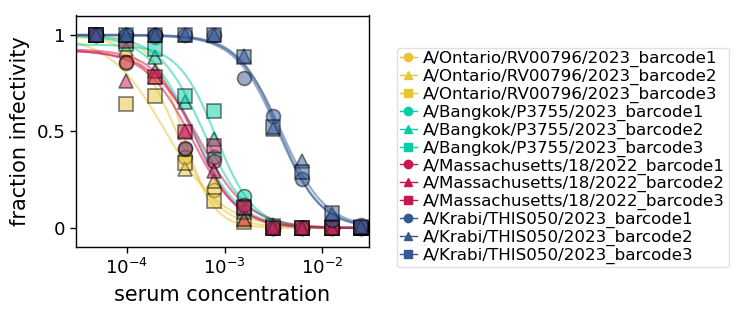

In [6]:
# Optionally set title of plot
title = ''

# Identify the sera and viruses to use for toy plots
serum = 'SCH23_y2009_s007'
viruses = [
    'A/Ontario/RV00796/2023', 'A/Bangkok/P3755/2023',
    'A/Massachusetts/18/2022', 'A/Krabi/THIS050/2023', 
]
markers = ['o', '^', 's']

virus_to_color_dict = {
    'A/Krabi/THIS050/2023': palette[0], 
    'A/Massachusetts/18/2022': palette[2],
    'A/Ontario/RV00796/2023': palette[3], 
    'A/Bangkok/P3755/2023': palette[1],    
}

# Make a replicate dictionary
replicate_dict = {}
for vir in viruses:
    replicate_dict[vir] = (fits_seqbasedneut.replicates[('SCH23_y2009_s007', f'{vir}')])[0:3] # Ignore the 4th replicate, which is 'average'

# Get curves for serum-virus-replicate
# Initialize list for curves
curves_list = []

for vir in viruses:
    for i in list(range(0,3)):
        temp_dict = {}
        
        barcode_rep = replicate_dict[vir][i]

        temp_dict['serum'] = serum
        temp_dict['virus'] = vir
        temp_dict['replicate'] = barcode_rep
        temp_dict['color'] = virus_to_color_dict[vir]
        temp_dict['marker'] = markers[i]
        temp_dict['label'] = f'{vir}_barcode{i+1}'

        curves_list.append(temp_dict)


# Make plot
fig, axes = fits_seqbasedneut.plotGrid({(0,0): (title, curves_list)})

# Set y axis
axes[0,0].set_ylim(-0.1, 1.1)
axes[0,0].set_yticks([0, 0.5, 1.0])
axes[0,0].set_yticklabels(labels=[0, 0.5, 1], fontsize=13)

# Set x axis
axes[0,0].set_xlim(0.00003, 0.03)
axes[0,0].set_xticks([0.01, 0.001, 0.0001, ])
axes[0,0].set_xticklabels(labels=[r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'], fontsize=13)

# Markers
plt.setp(axes[0,0].lines, alpha=0.5, markersize = 10, markeredgewidth=1.2, markeredgecolor="black", linewidth=1.6) 

    
# Change all spines
for axis in ["top", "bottom", "left", "right"]:
    axes[0,0].spines[axis].set_linewidth(1)
axes[0,0].tick_params(axis="both", length=4, width=1)

# Save to file
pdf_file = 'results/toy_TWO_virus_barcode_curve.svg'
print(f"Saving to {pdf_file=}")
fig.savefig(pdf_file, bbox_inches='tight', dpi=600)


Saving to pdf_file='results/toy_four_virus_barcode_curve.svg'


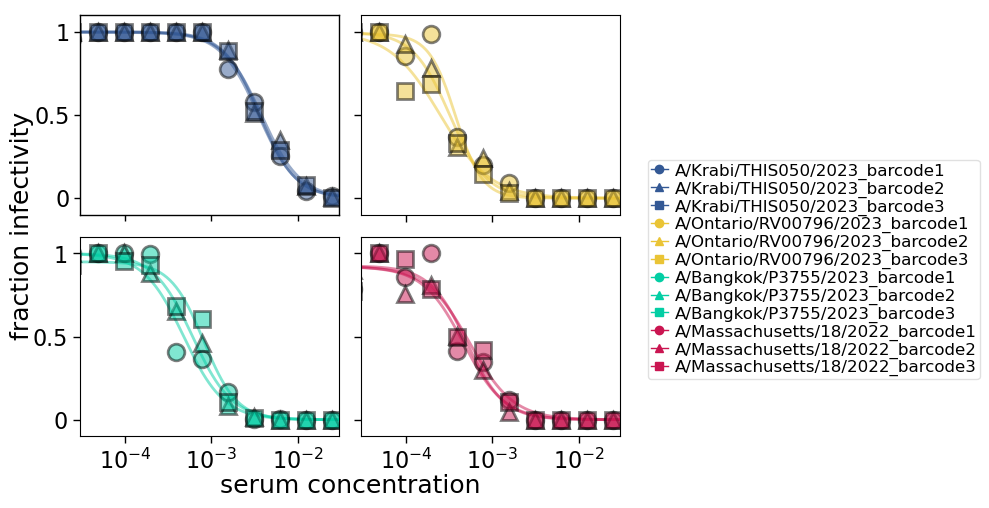

In [21]:
# Optionally set title of plot
title = ''

# Identify the sera and viruses to use for toy plots
serum = 'SCH23_y2009_s007'
viruses = [
    'A/Krabi/THIS050/2023',
    'A/Ontario/RV00796/2023', 'A/Bangkok/P3755/2023',
    'A/Massachusetts/18/2022',  
]

markers = ['o', '^', 's']

virus_to_color_dict = {
    'A/Krabi/THIS050/2023': palette[0], 
    'A/Massachusetts/18/2022': palette[2],
    'A/Ontario/RV00796/2023': palette[3], 
    'A/Bangkok/P3755/2023': palette[1],    
}

# Make a replicate dictionary
replicate_dict = {}
for vir in viruses:
    replicate_dict[vir] = (fits_seqbasedneut.replicates[('SCH23_y2009_s007', f'{vir}')])[0:3] # Ignore the 4th replicate, which is 'average'

# Get curves for serum-virus-replicate
# Initialize list for curves
curves_dict = {}
j = 0

for vir in viruses:
    virus_list = []
    
    for i in list(range(0,3)):
        temp_dict = {}
        
        barcode_rep = replicate_dict[vir][i]

        temp_dict['serum'] = serum
        temp_dict['virus'] = vir
        temp_dict['replicate'] = barcode_rep
        temp_dict['color'] = virus_to_color_dict[vir]
        temp_dict['marker'] = markers[i]
        temp_dict['label'] = f'{vir}_barcode{i+1}'

        virus_list.append(temp_dict)

    if j == 0:
        curves_dict[0,0] = title, virus_list
    elif j == 1:
        curves_dict[0,1] = title, virus_list
    elif j == 2:
        curves_dict[1,0] = title, virus_list
    elif j == 3:
        curves_dict[1,1] = title, virus_list

    j+=1
        
# Make plot
fig, axes = fits_seqbasedneut.plotGrid(curves_dict, labelsize=18)

# Loop over all axes in the grid to set the settings
for ax in axes.flat:
    # Set y axis
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0, 0.5, 1.0])
    ax.set_yticklabels(labels=[0, 0.5, 1], fontsize=16)
    
    # Set x axis
    ax.set_xlim(0.00003, 0.03)
    ax.set_xticks([0.01, 0.001, 0.0001, ])
    ax.set_xticklabels(labels=[r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'], fontsize=16)
    
    # Markers
    plt.setp(ax.lines, alpha=0.5, markersize = 12, markeredgewidth=2, markeredgecolor="black", linewidth=2) 


    
# Change all spines
for axis in ["top", "bottom", "left", "right"]:
    axes[0,0].spines[axis].set_linewidth(1)
axes[0,0].tick_params(axis="both", length=4, width=1)


# Save to file
pdf_file = 'results/toy_four_virus_barcode_curve.svg'
print(f"Saving to {pdf_file=}")
fig.savefig(pdf_file, bbox_inches='tight', dpi=600)


ValueError: Axes(0.122326,0.139709;0.812517x0.751573) has no legend attached.

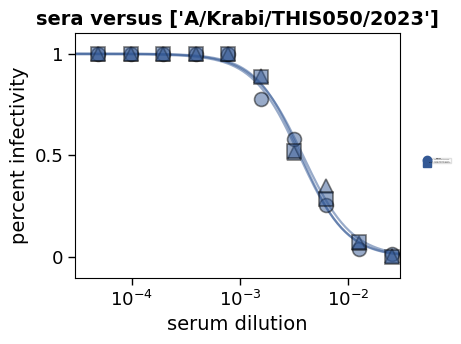

In [8]:
plt.close()

s = ['SCH23_y2009_s007']
v = ['A/Krabi/THIS050/2023']

fig, axes = fits_seqbasedneut.plotReplicates(
    sera=s,
    viruses=v,
    ncol=4,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    legendfontsize=0,
    legendtitle='barcode',
    fix_lims={'xmin':0.00003,'xmax':0.03},
    colors= [palette[0],palette[0],palette[0],
            palette[2],palette[2],palette[2]],
    xlabel="",
    ylabel="",
    attempt_shared_legend=True,
)


axes[0,0].set_title(
    f'sera versus {v}',
    weight="bold",
    fontsize=14,
)
axes[0,0].set_xlabel(
    "serum dilution", 
    fontsize=14,
)
axes[0,0].set_ylabel(
    "percent infectivity", 
    fontsize=14,
)

# Set y axis
axes[0,0].set_ylim(-0.1, 1.1)
axes[0,0].set_yticks([0, 0.5, 1.0])
axes[0,0].set_yticklabels(labels=[0, 0.5, 1], fontsize=13)

# Set x axis
axes[0,0].set_xlim(0.00003, 0.03)
axes[0,0].set_xticks([0.01, 0.001, 0.0001, ])
axes[0,0].set_xticklabels(labels=[r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'], fontsize=13)

# Markers
plt.setp(axes[0,0].lines, alpha=0.5, markersize = 10, markeredgewidth=1.2, markeredgecolor="black", linewidth=1.6) 

# Move legend
sns.move_legend(
    axes[0,0], 
    bbox_to_anchor=(1.05, 0.75), 
    loc="upper left",
    borderaxespad=0,
    frameon=False,
    fontsize=13,
    title="",
    title_fontproperties={"weight" : "bold", "size" : 11},
    alignment="left"
)

# Add edges to legend markers to match scatter plot
for i, ha in enumerate(axes[0,0].legend_.legend_handles):
    ha.set_label(f'Test Label {i + 1}')
    ha.set_markeredgecolor("black")
    ha.set_markersize(10)
    ha.set_markeredgewidth(1)
    ha.set_linewidth(0)

    
# Change all spines
for axis in ["top", "bottom", "left", "right"]:
    axes[0,0].spines[axis].set_linewidth(1)
axes[0,0].tick_params(axis="both", length=4, width=1)

# Save to file
pdf_file = 'results/toy_barcode_curve.png'
print(f"Saving to {pdf_file=}")
fig.savefig(pdf_file, bbox_inches='tight', dpi=600)



Saving to pdf_file='results/toy_two_curve.png'


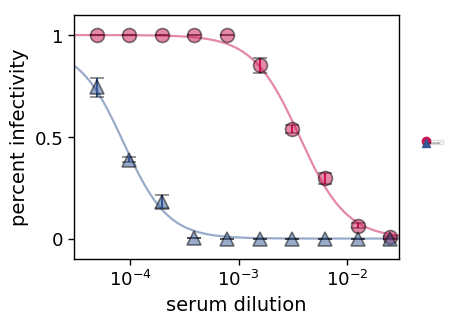

In [16]:
plt.close()

s = ['SCH23_y2009_s007']
v = ['A/Krabi/THIS050/2023', 'A/Busan/1301/2023']

fig, axes = fits_seqbasedneut.plotSera(
    sera=s,
    viruses=v,
    ncol=4,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    legendfontsize=0,
    legendtitle='',
    fix_lims={'xmin':0.00003,'xmax':0.03},
    colors= [palette[2],palette[0],palette[0]],
    # markers=markers,
    xlabel="",
    ylabel="",
    attempt_shared_legend=True,
    # despine=True
)


axes[0,0].set_title(
    '',
    weight="bold",
    fontsize=14,
)
axes[0,0].set_xlabel(
    "serum dilution", 
    fontsize=14,
)
axes[0,0].set_ylabel(
    "percent infectivity", 
    fontsize=14,
)

# Set y axis
axes[0,0].set_ylim(-0.1, 1.1)
axes[0,0].set_yticks([0, 0.5, 1.0])
axes[0,0].set_yticklabels(labels=[0, 0.5, 1], fontsize=13)

# Set x axis
axes[0,0].set_xlim(0.00003, 0.03)
axes[0,0].set_xticks([0.01, 0.001, 0.0001, ])
axes[0,0].set_xticklabels(labels=[r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'], fontsize=13)

plt.setp(axes[0,0].lines, alpha=0.5, markersize = 10, markeredgewidth=1.2, markeredgecolor="black", linewidth=1.6) # Lines and markers
    
# Change all spines
for axis in ["top", "bottom", "left", "right"]:
    axes[0,0].spines[axis].set_linewidth(1)
axes[0,0].tick_params(axis="both", length=4, width=1)

# Save to file
pdf_file = 'results/toy_two_curve.png'
print(f"Saving to {pdf_file=}")
fig.savefig(pdf_file, bbox_inches='tight', dpi=600)

